#### Objective 

The objective of the project is to learn reading, manipulating and analysing geographic data and geospatial operations and analysis using python.New York city's child care center dataset and population statistics dataset is used  for geospatial analysis.Identify geographical distribution of children aged 0-5 from population statistics and ditribution of child care centers

#### Dataset

Child care center -https://hifld-geoplatform.opendata.arcgis.com/datasets/child-care-centers/
Population Statistics -https://data.cccnewyork.org/data/download

#### Library

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet

# Install geovisualization libraries
!pip install folium  --quiet
!pip install plotly_express  --quiet
!pip install mapclassify --quiet

# Install Pysal - Spatial Statistics
!pip install pysal --quiet
!pip install splot --quiet

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Anupama\Anaconda3\envs\map\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Anupama\\AppData\\Local\\Temp\\pip-install-3b9k3h7p\\fiona_657250620a69425d8dd437fcf6524179\\setup.py'"'"'; __file__='"'"'C:\\Users\\Anupama\\AppData\\Local\\Temp\\pip-install-3b9k3h7p\\fiona_657250620a69425d8dd437fcf6524179\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Anupama\AppData\Local\Temp\pip-pip-egg-info-kfk6slcl'
         cwd: C:\Users\Anupama\AppData\Local\Temp\pip-install-3b9k3h7p\fiona_657250620a69425d8dd437fcf6524179\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.6.0 requires numpy<1.17.0,>=1.8.2, but you have numpy 1.20.2 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.2.0 requires absl-py>=0.7.0, which is not installed.
tensorflow 2.2.0 requires astunparse==1.6.3, which is not installed.
tensorflow 2.2.0 requires gast==0.3.3, which is not installed.
tensorflow 2.2.0 requires google-pasta>=0.1.8, which is not installed.
tensorflow 2.2.0 requires grpcio>=1.8.6, which is not installed.
tensorflow 2.2.0 requires h5py<2.11.0,>=2.10.0, which is not installed.
tensorflow 2.2.0 requires keras-preprocessing>=1.1.0, which is not installed.
tensorflow 2.2.0 requires opt-einsum>=2.3.2, which is not installed.
tenso

In [2]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

AttributeError: module 'fiona' has no attribute '_loading'

In [5]:
import os
os.getcwd()

'C:\\Users\\Anupama\\Geomap'

### Pre-project work

Some pre-project work was done to understand basics of geodataframe and geoprocessing.Below are few code snippets from the pre-project work based on sweden pre-school dataset and population statistics.

In [3]:
population = gpd.read_file("dataset/dataset/pop_statistics.shp")


In [4]:
population.tail()
population.iloc[[1,25,40],[1,2,3,4,31]]

,Age0_5,Age6_9,Age10_15,Age16_19,geometry
1,37,35,40,24,"POLYGON ((688731.626 6547758.133, 686809.834 6..."
25,151,138,271,135,"POLYGON ((670931.034 6572832.649, 670930.539 6..."
40,185,65,93,48,"POLYGON ((661735.606 6571081.185, 661726.692 6..."


In [5]:
type(population)

geopandas.geodataframe.GeoDataFrame

In [6]:
# shape area of each object
population.area

0       5.780289e+07
1       1.302095e+08
2       1.064226e+08
3       1.282950e+08
4       4.458383e+08
            ...     
5980    7.285478e+08
5981    1.836107e+06
5982    6.228229e+06
5983    1.811785e+09
5984    1.433088e+09
Length: 5985, dtype: float64

In [7]:
#tuple of max and min coordinates on each axis for each shape
population.bounds


,minx,miny,maxx,maxy
0,679217.925921,6.612445e+06,690986.592841,6.621470e+06
1,674928.223384,6.535572e+06,688731.626302,6.552060e+06
2,687794.774871,6.634099e+06,699545.556590,6.652222e+06
3,715471.044123,6.631800e+06,744992.279803,6.643561e+06
4,717598.900660,6.615910e+06,755220.730344,6.636198e+06
...,...,...,...,...
5980,350809.720175,6.513861e+06,378692.127668,6.557539e+06
5981,367900.205770,6.547562e+06,369515.096630,6.549577e+06
5982,366577.011352,6.544812e+06,370054.012047,6.548317e+06
5983,399694.839159,6.671373e+06,446467.525436,6.748499e+06


In [8]:
#Geometric object has polygon and multi-polygons
population.geom_type

0            Polygon
1            Polygon
2            Polygon
3            Polygon
4            Polygon
            ...     
5980         Polygon
5981         Polygon
5982         Polygon
5983    MultiPolygon
5984    MultiPolygon
Length: 5985, dtype: object

In [9]:
# tests if coordinates make a shape that is reasonable geometric shape
population.is_valid

0        True
1        True
2        True
3        True
4        True
        ...  
5980     True
5981     True
5982     True
5983     True
5984    False
Length: 5985, dtype: bool

In [10]:
#population.total_bounds

In [11]:
population.shape

(5985, 32)

In [12]:
population.describe()

,Age0_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,Age40_44,Age45_49,...,Median_Inc,U_median,O_median,Tot20_pop,HH_Child,HH_NoChild,Single_Chi,Single_NoC,Others,Totalt_3
count,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,...,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000,5985.000000
mean,121.401671,82.988471,118.574269,74.310777,99.710610,123.616708,115.049457,106.705096,106.016374,109.798663,...,285435.133333,647.952047,649.822222,1297.774269,174.049958,187.463158,55.301921,307.431746,53.929490,778.176274
std,54.816171,39.147961,54.992497,30.605886,71.265027,80.912025,59.945579,44.796477,40.588165,38.774269,...,61541.401238,236.176029,219.424887,322.182859,75.320552,66.046965,26.740170,178.087220,35.170047,233.702336
min,0.000000,0.000000,0.000000,9.000000,3.000000,8.000000,10.000000,13.000000,6.000000,0.000000,...,3012.000000,80.000000,16.000000,487.000000,0.000000,22.000000,0.000000,19.000000,0.000000,242.000000
25%,84.000000,54.000000,78.000000,52.000000,60.000000,67.000000,73.000000,75.000000,77.000000,82.000000,...,248679.000000,472.000000,487.000000,1072.000000,119.000000,142.000000,35.000000,167.000000,30.000000,606.000000
50%,112.000000,78.000000,110.000000,70.000000,85.000000,102.000000,102.000000,100.000000,101.000000,105.000000,...,284589.000000,617.000000,639.000000,1299.000000,160.000000,181.000000,51.000000,271.000000,45.000000,764.000000
75%,148.000000,105.000000,152.000000,94.000000,119.000000,160.000000,142.000000,130.000000,130.000000,133.000000,...,320832.000000,791.000000,795.000000,1519.000000,218.000000,227.000000,70.000000,419.000000,68.000000,926.000000
max,541.000000,306.000000,400.000000,240.000000,1262.000000,1001.000000,759.000000,431.000000,334.000000,318.000000,...,562797.000000,2003.000000,1798.000000,2816.000000,550.000000,673.000000,183.000000,1523.000000,412.000000,2187.000000


In [13]:
population.centroid

0       POINT (684865.309 6616880.074)
1       POINT (680943.719 6544424.088)
2       POINT (693144.724 6644511.773)
3       POINT (727090.120 6636482.416)
4       POINT (737307.356 6626393.044)
                     ...              
5980    POINT (363855.739 6533473.909)
5981    POINT (368756.117 6548583.917)
5982    POINT (368579.110 6546514.558)
5983    POINT (427752.822 6719761.880)
5984    POINT (398546.416 6760947.946)
Length: 5985, dtype: geometry

In [14]:
population.crs

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
#population.intersects(preschools)

In [16]:
#population.contains(preschools)

In [17]:
population.geometry.name

'geometry'

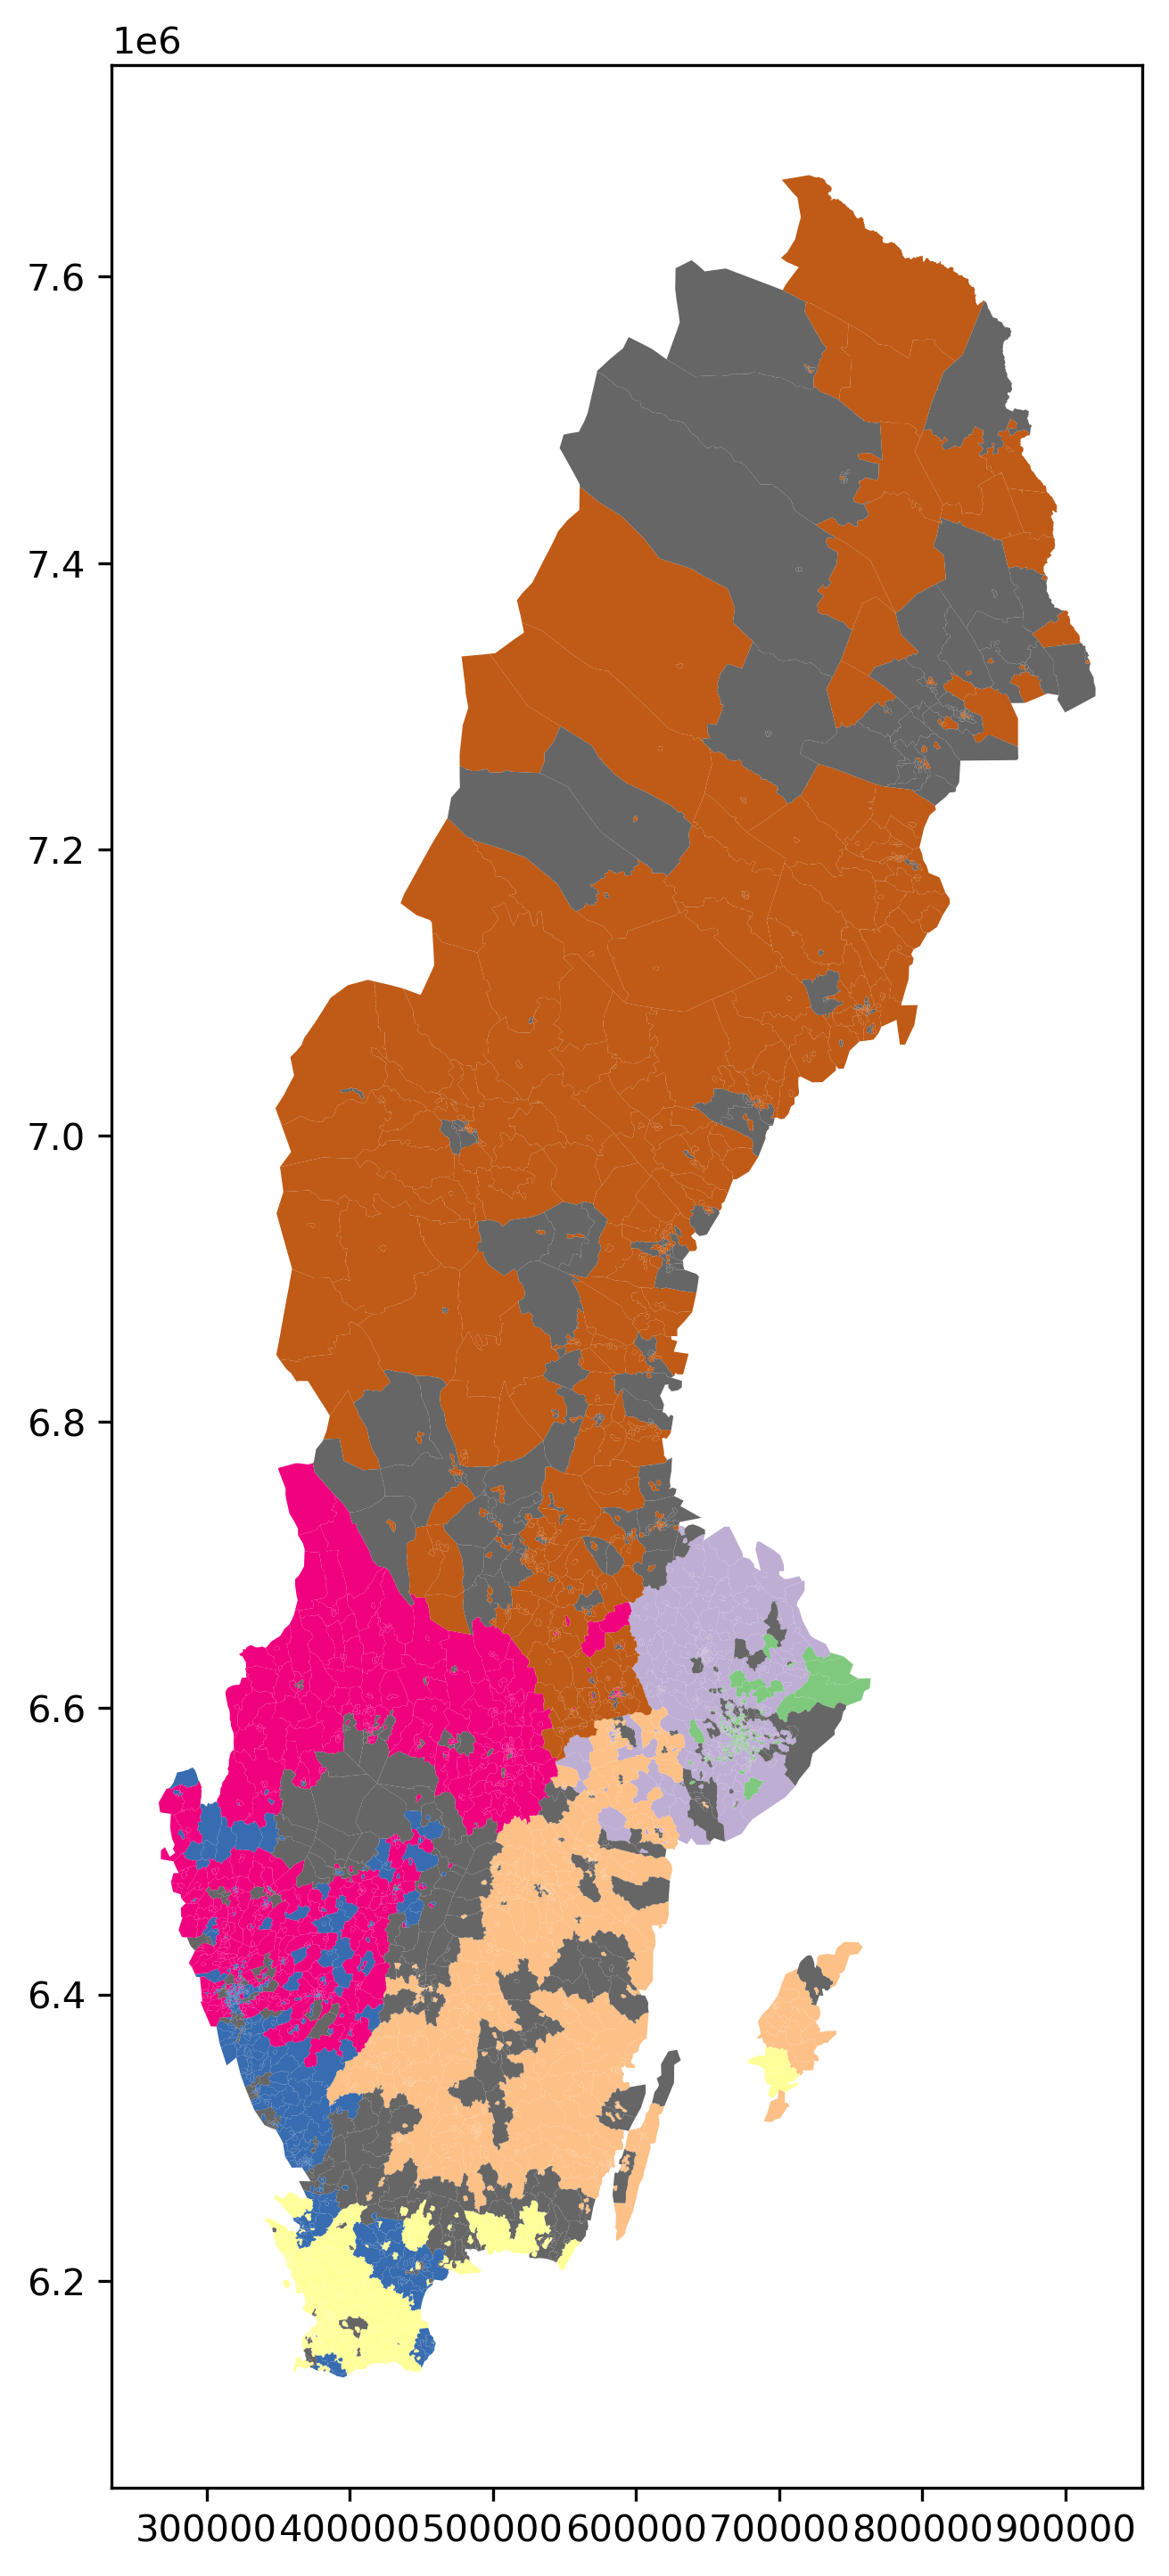

In [18]:
#population.plot()

fig, ax = plt.subplots(figsize=(14, 12),dpi=300)
population.plot(ax=ax,color='yellow',cmap='Accent')
plt.show()

In [19]:
preschools= gpd.read_file("dataset/dataset/preschools.shp")

In [20]:
preschools.head()

,Name,FIRMABEN,Address,City,POSTORT,POSTNUMMER,POSTADRESS,KOM,KOMTEXT,geometry
0,LIDINGÖ MONTESSORIFÖRSKOLA EKONOMISK FÖRENING,None,HOLMIAVÄGEN 8,LIDINGÖ,LIDINGÖ,18131,HOLMIAVÄGEN 8,186,Lidingö,POINT (678249.000 6585136.000)
1,EKERÖ PASTORAT,PASTORSEXPEDITION OCH KYRKANS FÖRSKOLA,BJÖRKUDDSVÄGEN 2,EKERÖ,EKERÖ,17822,BOX 116,125,Ekerö,POINT (659668.000 6575276.000)
2,BANKERYDS MISSIONSFÖRSAMLING,None,EKEFORSVÄGEN 22,BANKERYD,BANKERYD,56433,EKEFORSVÄGEN 22,680,Jönköping,POINT (447950.000 6412884.000)
3,PINGSTLILJANS FÖRSKOLA I TENHULT AB,None,VÄSTRA VÄGEN 2 B,TENHULT,TENHULT,56029,VÄSTRA VÄGEN 2,680,Jönköping,POINT (459569.000 6396416.000)
4,SOLSTRÅLENS FÖRSKOLA,None,ÅNARYD 26,GRÄNNA,GRÄNNA,56393,ÅNARYD 26,680,Jönköping,POINT (464770.000 6422324.000)


In [21]:
preschools.describe()

,POSTNUMMER,KOM
count,9599.000000,9599.000000
mean,46316.268465,1127.599229
std,25765.893893,750.421914
min,10028.000000,114.000000
25%,20580.000000,380.000000
50%,43332.000000,1280.000000
75%,68680.000000,1494.000000
max,98492.000000,2584.000000


In [22]:
preschools.shape

(9599, 10)

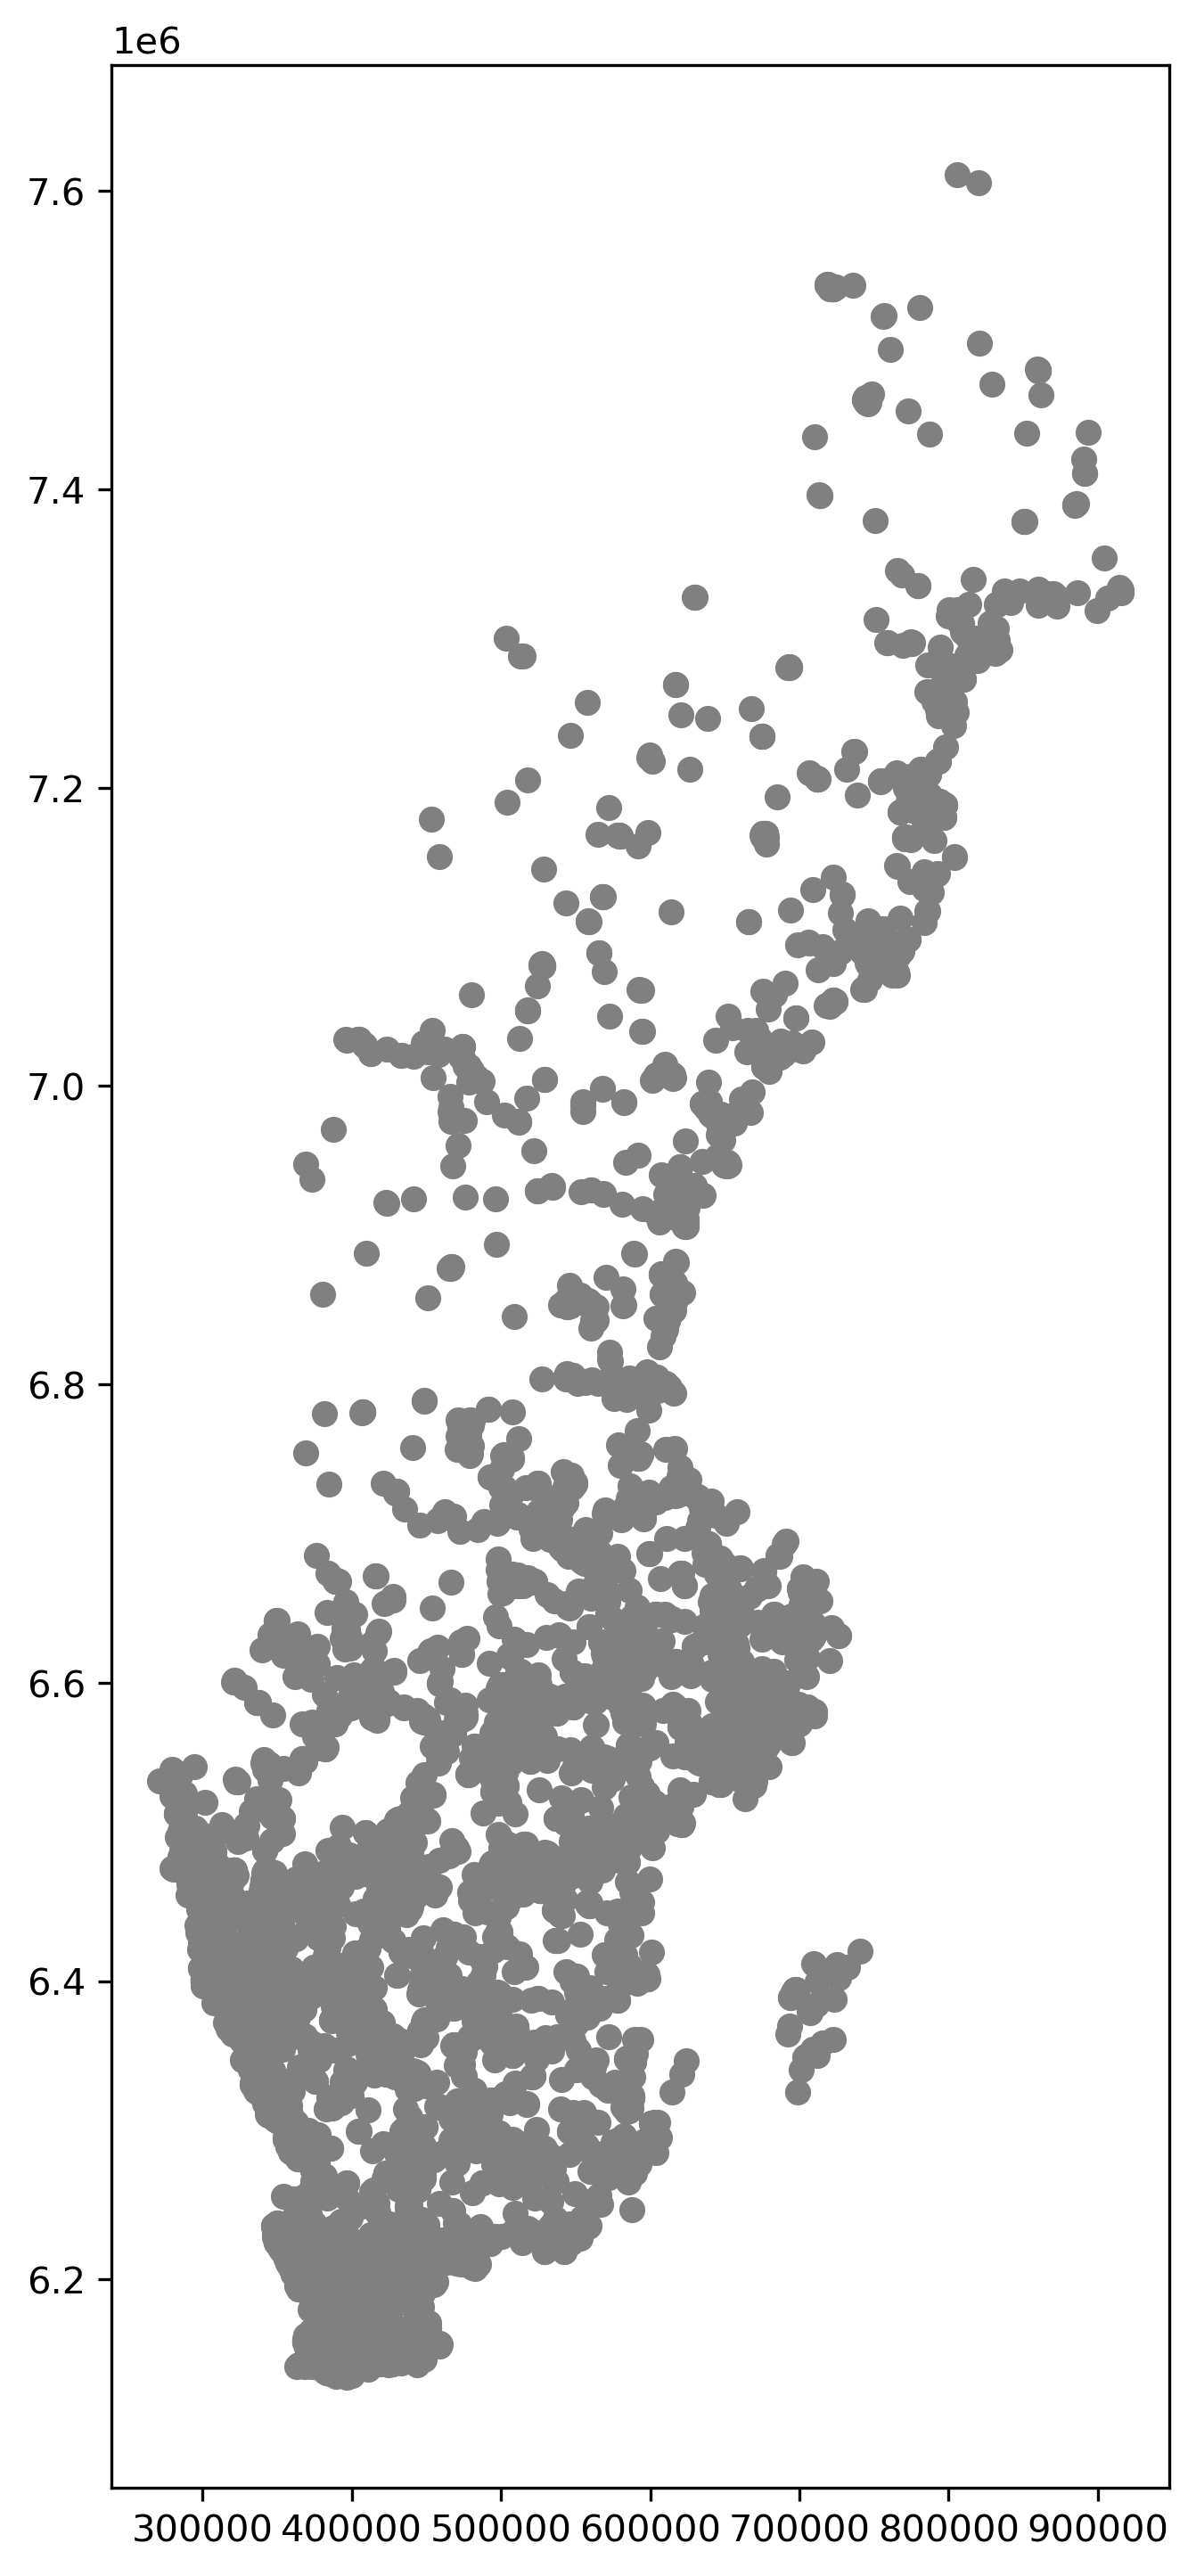

In [23]:
fig, ax = plt.subplots(figsize=(14, 12),dpi=300)
preschools.plot(ax=ax,color='grey')
plt.show()

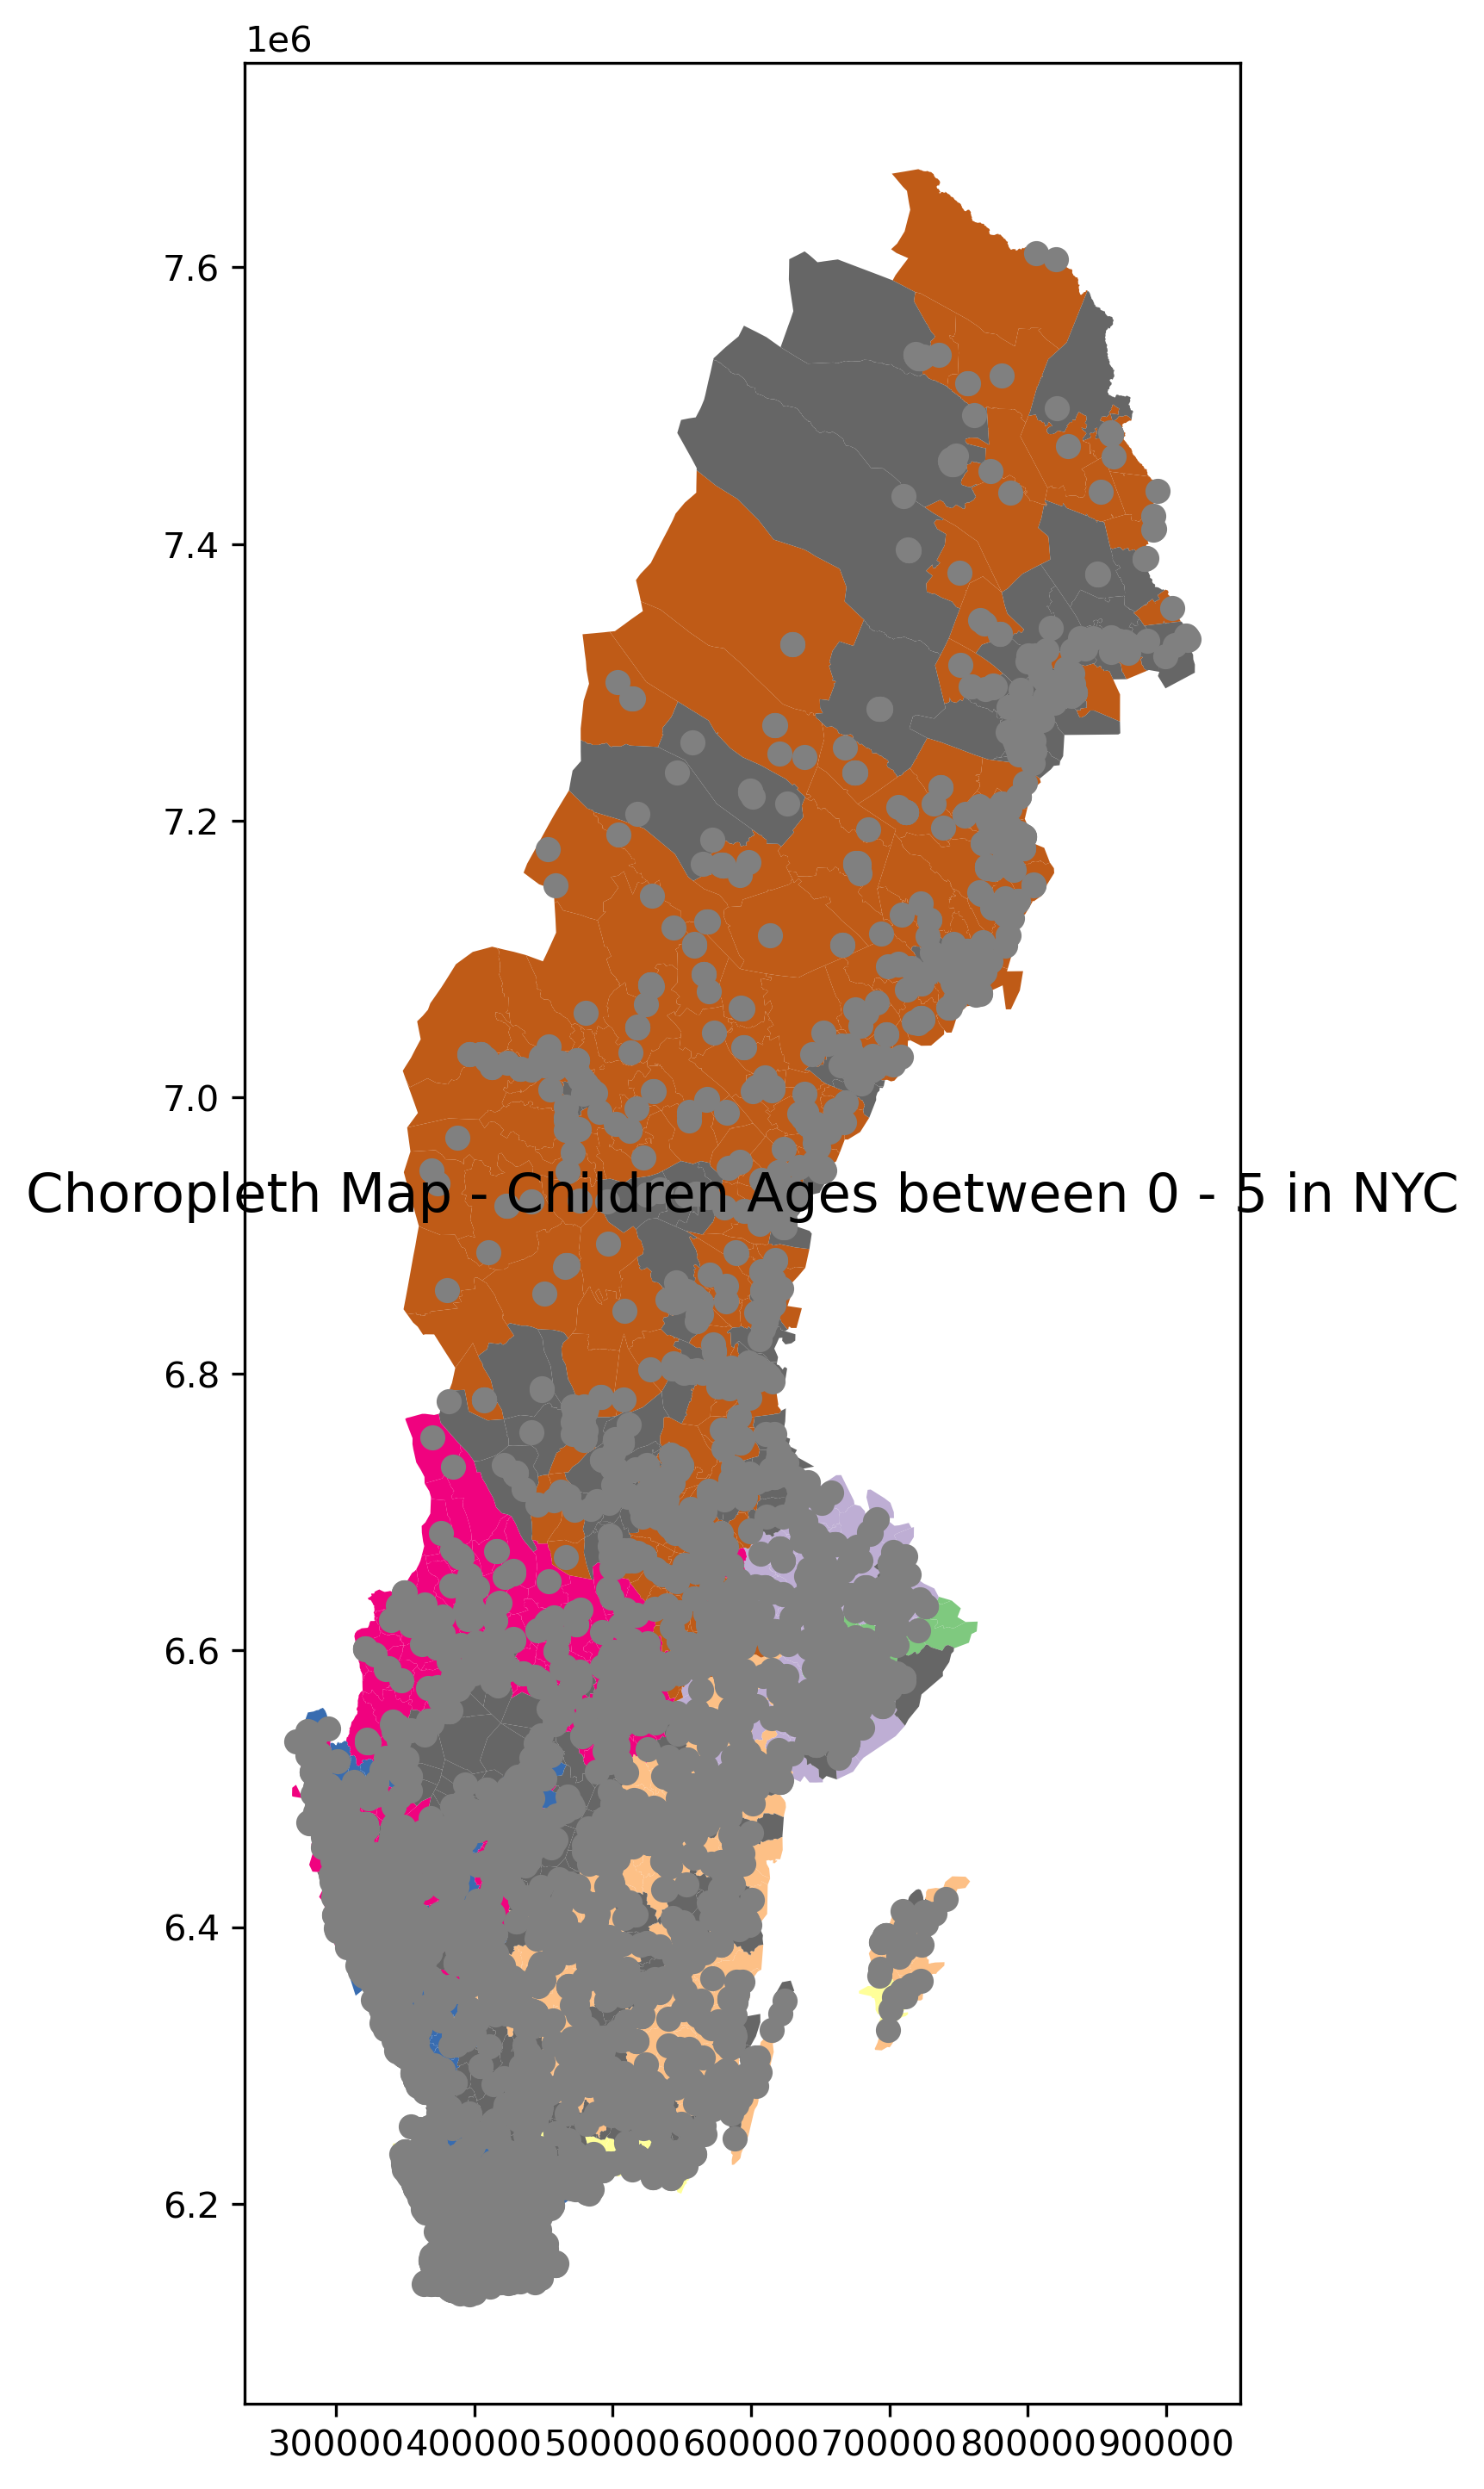

In [24]:
fig,ax=plt.subplots(figsize=(14, 12),dpi=300)
plt.title('Choropleth Map - Children Ages between 0 - 5 in NYC', fontsize= 15,  y=0.5)
population.plot(ax=ax,cmap='Accent')
preschools.plot(ax=ax,color='grey')




### Geoprocessing 

#### Intersection of Polygons

<AxesSubplot:>

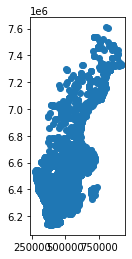

In [25]:
intersection=gpd.overlay(population,preschools,how='intersection',keep_geom_type=False)
intersection.plot()

#### Union of Polygons

<AxesSubplot:>

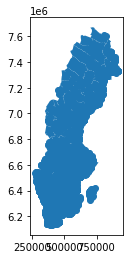

In [26]:
union=gpd.overlay(population,preschools,how='union',keep_geom_type=False)
union.plot()

In [27]:
union

,Deso,Age0_5,Age6_9,Age10_15,Age16_19,Age20_24,Age25_29,Age30_34,Age35_39,Age40_44,...,Name,FIRMABEN,Address,City,POSTORT,POSTNUMMER,POSTADRESS,KOM,KOMTEXT,geometry
0,0136A0010,37,35,40,24,32,32,25,30,45,...,HANINGE KOMMUN,MUSKÖ SKOLA OCH FÖRSKOLA,ARBOTTNAVÄGEN 1,MUSKÖ,HANINGE,13681.0,None,136.0,Haninge,POINT (680023.000 6543945.000)
1,0188A0150,71,46,59,59,55,55,48,57,52,...,NORRTÄLJE KOMMUN,EDSBRO FÖRSKOLA,BROKULLAVÄGEN 2,EDSBRO,EDSBRO,76297.0,SKOLVÄGEN 2,188.0,Norrtälje,POINT (694838.000 6644846.000)
2,0188A0130,62,39,63,59,38,63,50,53,48,...,NORRTÄLJE KOMMUN,"VÄTÖ SKOLA, FRITIDSHEM OCH FÖRSKOLA",HÅKNÄSVÄGEN 6,VÄTÖ,VÄTÖ,76021.0,HARG,188.0,Norrtälje,POINT (721737.000 6636751.000)
3,0188A0060,91,81,105,83,67,71,86,85,88,...,VIKTORIAGÅRDEN FÖRSKOLA EKONOMISK FÖRENING,None,GRÄDDÖ BYVÄG 6,GRÄDDÖ,GRÄDDÖ,76015.0,GRÄDDÖ BYVÄG 6,188.0,Norrtälje,POINT (726193.000 6631793.000)
4,0188A0060,91,81,105,83,67,71,86,85,88,...,VIKTORIAGÅRDEN FÖRSKOLA AB,None,GRÄDDÖ BYVÄG 6,GRÄDDÖ,GRÄDDÖ,76015.0,GRÄDDÖ BYVÄG 6,188.0,Norrtälje,POINT (726193.000 6631793.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15579,1492A0010,115,78,133,100,83,112,95,85,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((354505.508 6557539.452, 354769.449 6..."
15580,1492C1030,158,125,213,135,152,142,140,115,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((369392.176 6548316.729, 369309.202 6..."
15581,1492C1010,87,76,132,86,124,108,73,89,104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((366577.011 6545743.963, 366902.590 6..."
15582,2023A0010,87,46,85,53,57,88,70,77,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((401684.370 6729591.121, 401677..."


#### Symmetric Difference

<AxesSubplot:>

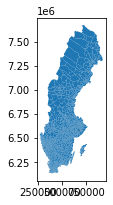

In [28]:
sd=gpd.overlay(population,preschools,how='symmetric_difference',keep_geom_type=False)
sd.plot(figsize=(14,3))

#### Difference

<AxesSubplot:>

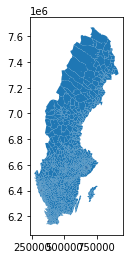

In [29]:
difference= gpd.overlay(population,preschools,how='difference',keep_geom_type=False)
difference.plot()

#### Dissolve

In [30]:
union=gpd.overlay(population,preschools,how='union',keep_geom_type=False)
union['common_col']=1

<AxesSubplot:>

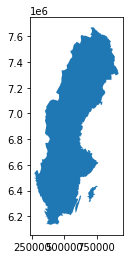

In [31]:
disolved=union.dissolve(by='common_col')
disolved.plot()

### New York City Child Care Centre and Population statistics

In [25]:
#Read NY neighbourhood shape file
ny = gpd.read_file("nynta.shp")

In [26]:
ny.tail()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,geometry
190,3,Brooklyn,047,BK93,Starrett City,17414.782263,1.159895e+07,"MULTIPOLYGON (((1015251.087 174914.561, 101524..."
191,3,Brooklyn,047,BK73,North Side-South Side,28149.966570,2.887016e+07,"POLYGON ((995851.916 203199.332, 995969.192 20..."
192,3,Brooklyn,047,BK90,East Williamsburg,49247.014740,3.913241e+07,"POLYGON ((1005302.497 199455.730, 1005307.792 ..."
193,1,Manhattan,061,MN21,Gramercy,12096.891069,7.526916e+06,"POLYGON ((990196.892 207745.371, 990187.613 20..."
194,1,Manhattan,061,MN50,Stuyvesant Town-Cooper Village,12021.748771,5.582242e+06,"MULTIPOLYGON (((994681.406 203127.675, 994780...."


In [27]:
#Read NY city child care centers
child_care=pd.read_csv("Child_Care_Centers.csv")

In [28]:
child_care.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,ST_SUBTYPE
0,-9.481339e+06,5.028492e+06,1,1222260097,MATTHEW'S HOUSE CHILD CARE MINISTRY,2305 GOSHEN ROAD,FORT WAYNE,IN,46808,NOT AVAILABLE,...,41.109406,-85.172318,624410,CHILD DAY CARE CENTERS,https://secure.in.gov/apps/fssa/carefinder/ind...,2019/09/18 00:00:00,IMAGERY,2018/12/03 00:00:00,NOT AVAILABLE,NOT AVAILABLE
1,-9.760009e+06,5.086024e+06,2,120560466,PK'S CHRISTIAN LEARNING SITE 2 INC,9 NORTH ST,PARK FOREST,IL,60466,NOT AVAILABLE,...,41.497650,-87.675652,624410,CHILD DAY CARE CENTERS,http://nw.inccrra.org/naccrrajsp/servlet/naccr...,2018/09/18 00:00:00,IMAGERY,2018/11/16 00:00:00,NOT AVAILABLE,NOT AVAILABLE
2,-1.052294e+07,4.712447e+06,3,116064137,CERNER KIDS REALIZATION LEARNING CENTER,10450 HICKMAN MILLS DR,KANSAS CITY,MO,64137,NOT AVAILABLE,...,38.935574,-94.529182,624410,CHILD DAY CARE CENTERS,https://webapp01.dhss.mo.gov/childcaresearch/S...,2018/12/03 00:00:00,IMAGERY,2016/03/18 00:00:00,NOT AVAILABLE,NOT AVAILABLE
3,-1.332006e+07,4.411510e+06,4,1222239999,CHILD DEVELOPMENT STATE PRESCHOOL - FREEDOM,2955 GETTYSBURG,CLOVIS,CA,93611,NOT AVAILABLE,...,36.801754,-119.656140,624410,CHILD DAY CARE CENTERS,https://secure.dss.ca.gov/CareFacilitySearch/H...,2017/12/16 00:00:00,IMAGERY/OTHER,2019/03/01 00:00:00,NOT AVAILABLE,NOT AVAILABLE
4,-1.356230e+07,4.642993e+06,5,1222244651,EARLY LEARNING CENTER OF DIXON,"355 NORTH ALMOND ST., ROOM 21",DIXON,CA,95620,NOT AVAILABLE,...,38.448597,-121.832180,624410,CHILD DAY CARE CENTERS,https://secure.dss.ca.gov/CareFacilitySearch/H...,2017/12/16 00:00:00,IMAGERY/OTHER,2019/09/30 00:00:00,NOT AVAILABLE,NOT AVAILABLE


In [29]:
#filter for NY city
#child_care_ny=child_care[child_care['CITY']=='NEW YORK CITY']

In [30]:
child_care_ny=child_care[child_care['STATE']=='NY']

In [31]:
child_care_ny.shape

(6602, 27)

In [32]:
child_care_ny.tail()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,ST_SUBTYPE
120978,-8.233264e+06,4.969400e+06,121184,1222245194,EL PUENTE @ WILLIAMS PLAZA,323 ROEBLING STREET,BROOKLYN,NY,11211,NOT AVAILABLE,...,40.708225,-73.960670,624410,CHILD DAY CARE CENTERS,https://a816-healthpsi.nyc.gov/ChildCare/Child...,2018/11/20 00:00:00,IMAGERY,2019/03/20 00:00:00,NOT AVAILABLE,NOT AVAILABLE
121001,-8.799825e+06,5.327712e+06,121207,1222279710,YMCA BUFFALO NIAGARA,1625 LOCKPORT STREET,NIAGARA FALLS,NY,14305,NOT AVAILABLE,...,43.103321,-79.050179,624410,CHILD DAY CARE CENTERS,http://ocfs.ny.gov/main/childcare/ccfs_templat...,2018/11/20 00:00:00,IMAGERY,2018/06/29 00:00:00,NOT AVAILABLE,NOT AVAILABLE
121002,-8.202666e+06,5.050415e+06,121208,1222252788,"KATONAH VILLAGE KIDS, INC.",31 BEDFORD ROAD,KATONAH,NY,10536,NOT AVAILABLE,...,41.257618,-73.685799,624410,CHILD DAY CARE CENTERS,http://ocfs.ny.gov/main/childcare/ccfs_templat...,2018/11/20 00:00:00,IMAGERY/OTHER,2019/03/20 00:00:00,NOT AVAILABLE,NOT AVAILABLE
121058,-8.726800e+06,5.344651e+06,121264,1222248302,GLOW YMCA,335 W. OAK ORCHARD ST.,MEDINA,NY,14103,NOT AVAILABLE,...,43.214325,-78.394180,624410,CHILD DAY CARE CENTERS,http://ocfs.ny.gov/main/childcare/ccfs_templat...,2018/11/20 00:00:00,IMAGERY/OTHER,2019/03/20 00:00:00,NOT AVAILABLE,NOT AVAILABLE
121059,-8.775795e+06,5.295150e+06,121265,1222259088,LT. COL. MATT URBAN HUMAN SERVICES CENTER OF WNY,385 PADEREWSKI DRIVE,BUFFALO,NY,14212,NOT AVAILABLE,...,42.889385,-78.834312,624410,CHILD DAY CARE CENTERS,http://ocfs.ny.gov/main/childcare/ccfs_templat...,2018/11/20 00:00:00,IMAGERY/OTHER,2019/03/20 00:00:00,NOT AVAILABLE,NOT AVAILABLE


In [33]:
child_care_ny=child_care_ny.drop(['OBJECTID','ID','ZIP4','TELEPHONE','STATUS','POPULATION','COUNTYFIPS','COUNTRY','NAICS_CODE','NAICS_DESC','SOURCE','SOURCEDATE','VAL_METHOD','VAL_DATE','WEBSITE','ST_SUBTYPE','CITY','STATE'],axis=1)

In [34]:
child_care_ny.head()

,X,Y,NAME,ADDRESS,ZIP,TYPE,COUNTY,LATITUDE,LONGITUDE
1042,-8.576113e+06,5.347010e+06,WAYNE CAP INC.SODUS HEAD START,7192 OLD RIDGE ROAD,14551,HEAD START,WAYNE,43.229763,-77.040535
1043,-8.605774e+06,5.322120e+06,CREATIVE ENVIRONMENT CHILDREN'S LEARNING CENTER,28 MAIN STREET,14502,CENTER BASED,WAYNE,43.066639,-77.306984
1044,-8.779693e+06,5.319755e+06,YMCA BUFFALO NIAGARA,455 MEADOW DRIVE,14120,CENTER BASED,NIAGARA,43.051113,-78.869324
1045,-8.400522e+06,5.347445e+06,YMCA OF THE GREATER TRI-VALLEY,1001 RUBY STREET,13440,CENTER BASED,ONEIDA,43.232613,-75.463181
1046,-8.220696e+06,4.971327e+06,FOREST HILLS JEWISH CTR,106-06 QUEENS BOULEVARD,11375,CENTER BASED,QUEENS,40.721348,-73.847771


In [35]:
child_care_ny=child_care_ny.reset_index(drop=True)
child_care_ny.to_csv (r'C:\Users\Anupama\Geomap\child_care_ny.csv', index = False, header=True)

In [36]:
#drop old dataframe

In [37]:
#Use the new dataframe from here
child_care_nyc=pd.read_csv("child_care_ny.csv")

In [38]:
child_care_ny_gdf = gpd.GeoDataFrame(
    child_care_nyc, geometry=gpd.points_from_xy(child_care_nyc.LONGITUDE, child_care_nyc.LATITUDE))

In [39]:
child_care_ny_gdf.geometry=child_care_ny_gdf.geometry.set_crs("EPSG:4326")

In [40]:
#Read newyork city borough
nybb= gpd.read_file(gpd.datasets.get_path('nybb'))

In [41]:
nybb.head(50)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


#### Plot on nybb

In [42]:
#projected to EPSG:2263
child_care_ny_proj= child_care_ny_gdf.to_crs("EPSG:2263")
child_care_ny_proj.head()

,X,Y,NAME,ADDRESS,ZIP,TYPE,COUNTY,LATITUDE,LONGITUDE,geometry
0,-8.576113e+06,5.347010e+06,WAYNE CAP INC.SODUS HEAD START,7192 OLD RIDGE ROAD,14551,HEAD START,WAYNE,43.229763,-77.040535,POINT (173337.915 1130499.327)
1,-8.605774e+06,5.322120e+06,CREATIVE ENVIRONMENT CHILDREN'S LEARNING CENTER,28 MAIN STREET,14502,CENTER BASED,WAYNE,43.066639,-77.306984,POINT (100062.360 1073611.929)
2,-8.779693e+06,5.319755e+06,YMCA BUFFALO NIAGARA,455 MEADOW DRIVE,14120,CENTER BASED,NIAGARA,43.051113,-78.869324,POINT (-317613.574 1087449.905)
3,-8.400522e+06,5.347445e+06,YMCA OF THE GREATER TRI-VALLEY,1001 RUBY STREET,13440,CENTER BASED,ONEIDA,43.232613,-75.463181,POINT (593976.099 1120723.620)
4,-8.220696e+06,4.971327e+06,FOREST HILLS JEWISH CTR,106-06 QUEENS BOULEVARD,11375,CENTER BASED,QUEENS,40.721348,-73.847771,POINT (1026446.646 202119.726)


In [43]:
from geopandas.tools import sjoin
child_care_ny_clean = sjoin(child_care_ny_proj,nybb , how="inner", op='intersects')
child_care_ny_clean = child_care_ny_clean.drop(['index_right'], axis=1)
child_care_ny_clean=child_care_ny_clean.reset_index(drop=True)
child_care_ny_clean.head()


,X,Y,NAME,ADDRESS,ZIP,TYPE,COUNTY,LATITUDE,LONGITUDE,geometry,BoroCode,BoroName,Shape_Leng,Shape_Area
0,-8.220696e+06,4.971327e+06,FOREST HILLS JEWISH CTR,106-06 QUEENS BOULEVARD,11375,CENTER BASED,QUEENS,40.721348,-73.847771,POINT (1026446.646 202119.726),4,Queens,896344.047763,3.045213e+09
1,-8.209953e+06,4.954333e+06,WHDC CHRISTIAN ACADEMY,1521 CENTRAL AVENUE,11691,CENTER BASED,QUEENS,40.605549,-73.751266,POINT (1053316.788 159992.282),4,Queens,896344.047763,3.045213e+09
2,-8.212164e+06,4.978432e+06,SPORTS & ARTS IN SCHOOLS FOUNDATION @ PS 41,214-43 35TH AVENUE,11361,CENTER BASED,QUEENS,40.769707,-73.771118,POINT (1047648.160 219784.618),4,Queens,896344.047763,3.045213e+09
3,-8.212691e+06,4.964484e+06,"THE CHILD CENTER OF NY, INC. @ BASIE BEACON IS 72",133-25 GUY R. BREWER BLVD.,11434,CENTER BASED,QUEENS,40.674740,-73.775864,POINT (1046422.095 185181.925),4,Queens,896344.047763,3.045213e+09
4,-8.230883e+06,4.976798e+06,JACOB A. RIIS SETTLEMENT HOUSE @ PS 111Q,37-15 13TH STREET,11101,CENTER BASED,QUEENS,40.758587,-73.939285,POINT (1001070.310 215656.239),4,Queens,896344.047763,3.045213e+09


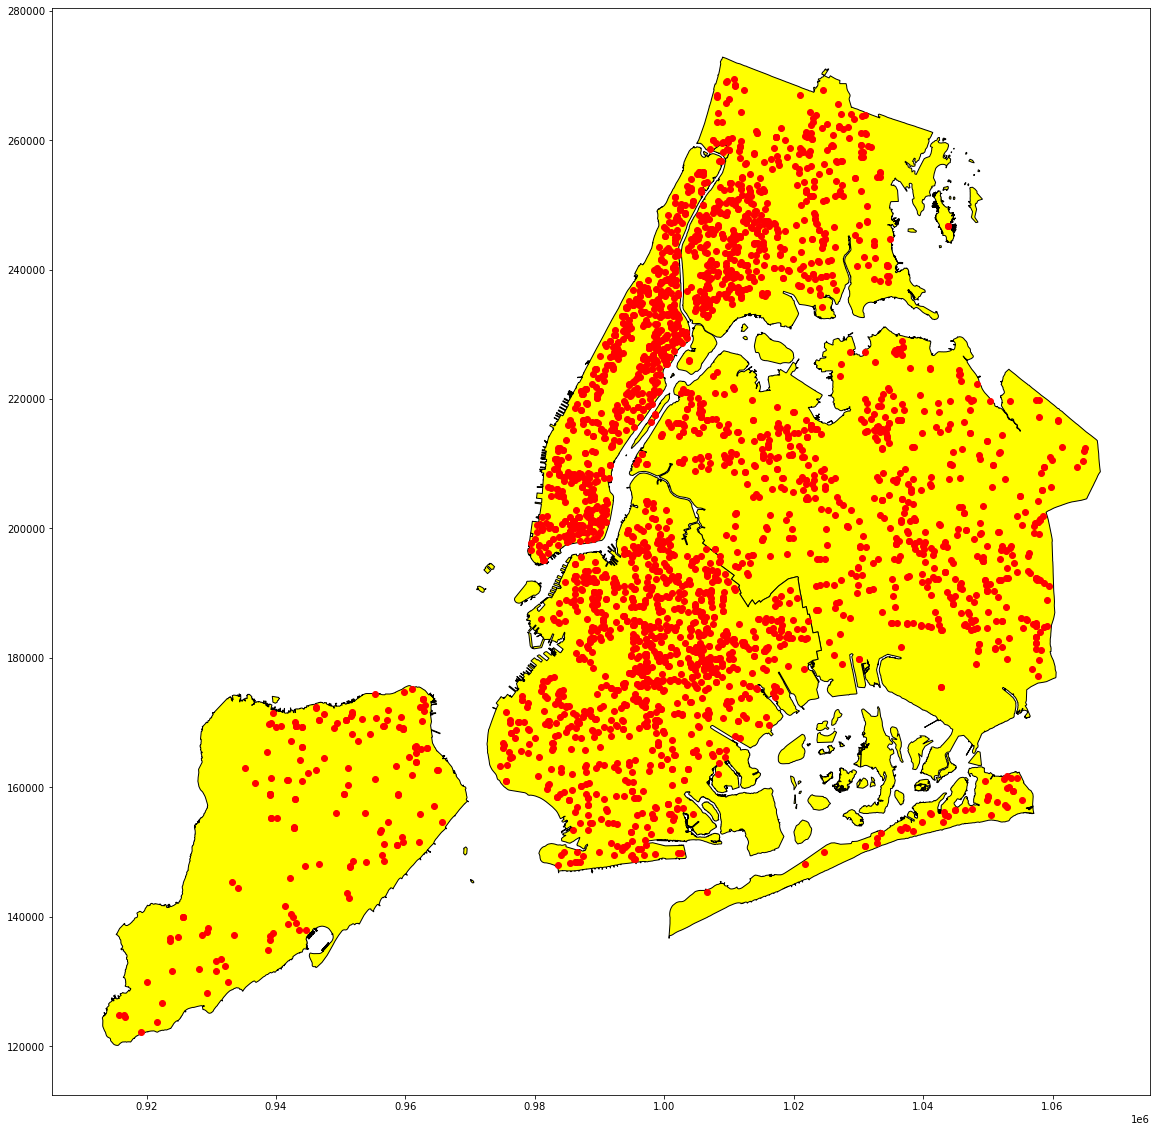

In [44]:
#Plot child care centers with nybb
ax = nybb.plot(figsize=(30,20),color='yellow', edgecolor='black')
child_care_ny_clean.plot(ax=ax, color='red')

plt.show()

In [45]:
child_care_ny_clean= child_care_ny_clean.to_crs("EPSG:4326")

In [46]:
community = gpd.read_file("community/geo_export_929fbe61-87e0-40af-a1ec-4f4884bb6b3e.shp")

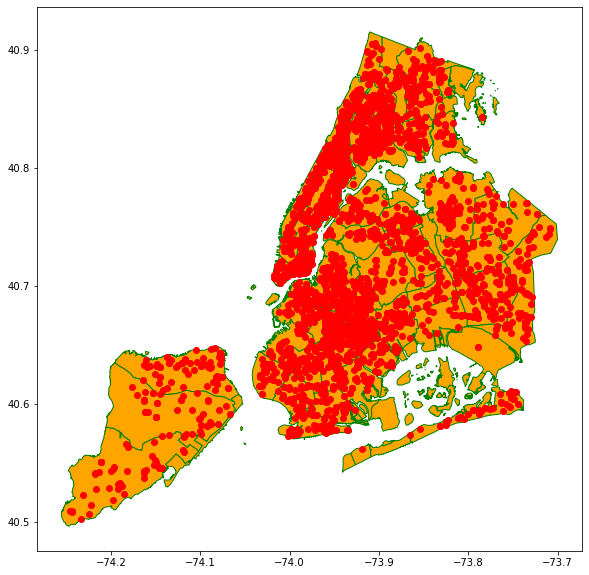

In [47]:
#Plot the points in community

ax = community.plot(figsize=(20,10),color='orange', edgecolor='green')
child_care_ny_clean.plot(ax=ax, color='red')

plt.show()

In [48]:
community['boro_cd'] = community['boro_cd'].astype('int64')

In [49]:
child_population=pd.read_csv("child_pop.csv")

In [50]:
child_population.head()

,location,age_group,year,count,boro_cd
0,Battery Park/Tribeca,Under 5 Years,2019,3293.34669,101
1,Greenwich Village,Under 5 Years,2019,4861.65331,102
2,Lower East Side,Under 5 Years,2019,4967.00000,103
3,Chelsea/Clinton,Under 5 Years,2019,3532.84799,104
4,Midtown Business District,Under 5 Years,2019,1768.15201,105


In [51]:
child_population.shape

(59, 5)

In [52]:
population_community  = community.merge(child_population, on='boro_cd', how='right')

In [53]:
population_community.head()

,boro_cd,shape_area,shape_leng,geometry,location,age_group,year,count
0,101,4.268912e+07,74168.587892,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",Battery Park/Tribeca,Under 5 Years,2019,3293.34669
1,102,3.768921e+07,34130.595277,"POLYGON ((-73.99684 40.73736, -73.99362 40.736...",Greenwich Village,Under 5 Years,2019,4861.65331
2,103,4.687978e+07,30695.640963,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",Lower East Side,Under 5 Years,2019,4967.00000
3,104,4.931172e+07,67623.669901,"POLYGON ((-73.99394 40.77318, -73.99370 40.773...",Chelsea/Clinton,Under 5 Years,2019,3532.84799
4,105,4.379033e+07,35288.188510,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",Midtown Business District,Under 5 Years,2019,1768.15201


In [54]:
child_care_ny_clean.head()

,X,Y,NAME,ADDRESS,ZIP,TYPE,COUNTY,LATITUDE,LONGITUDE,geometry,BoroCode,BoroName,Shape_Leng,Shape_Area
0,-8.220696e+06,4.971327e+06,FOREST HILLS JEWISH CTR,106-06 QUEENS BOULEVARD,11375,CENTER BASED,QUEENS,40.721348,-73.847771,POINT (-73.84777 40.72135),4,Queens,896344.047763,3.045213e+09
1,-8.209953e+06,4.954333e+06,WHDC CHRISTIAN ACADEMY,1521 CENTRAL AVENUE,11691,CENTER BASED,QUEENS,40.605549,-73.751266,POINT (-73.75127 40.60555),4,Queens,896344.047763,3.045213e+09
2,-8.212164e+06,4.978432e+06,SPORTS & ARTS IN SCHOOLS FOUNDATION @ PS 41,214-43 35TH AVENUE,11361,CENTER BASED,QUEENS,40.769707,-73.771118,POINT (-73.77112 40.76971),4,Queens,896344.047763,3.045213e+09
3,-8.212691e+06,4.964484e+06,"THE CHILD CENTER OF NY, INC. @ BASIE BEACON IS 72",133-25 GUY R. BREWER BLVD.,11434,CENTER BASED,QUEENS,40.674740,-73.775864,POINT (-73.77586 40.67474),4,Queens,896344.047763,3.045213e+09
4,-8.230883e+06,4.976798e+06,JACOB A. RIIS SETTLEMENT HOUSE @ PS 111Q,37-15 13TH STREET,11101,CENTER BASED,QUEENS,40.758587,-73.939285,POINT (-73.93928 40.75859),4,Queens,896344.047763,3.045213e+09


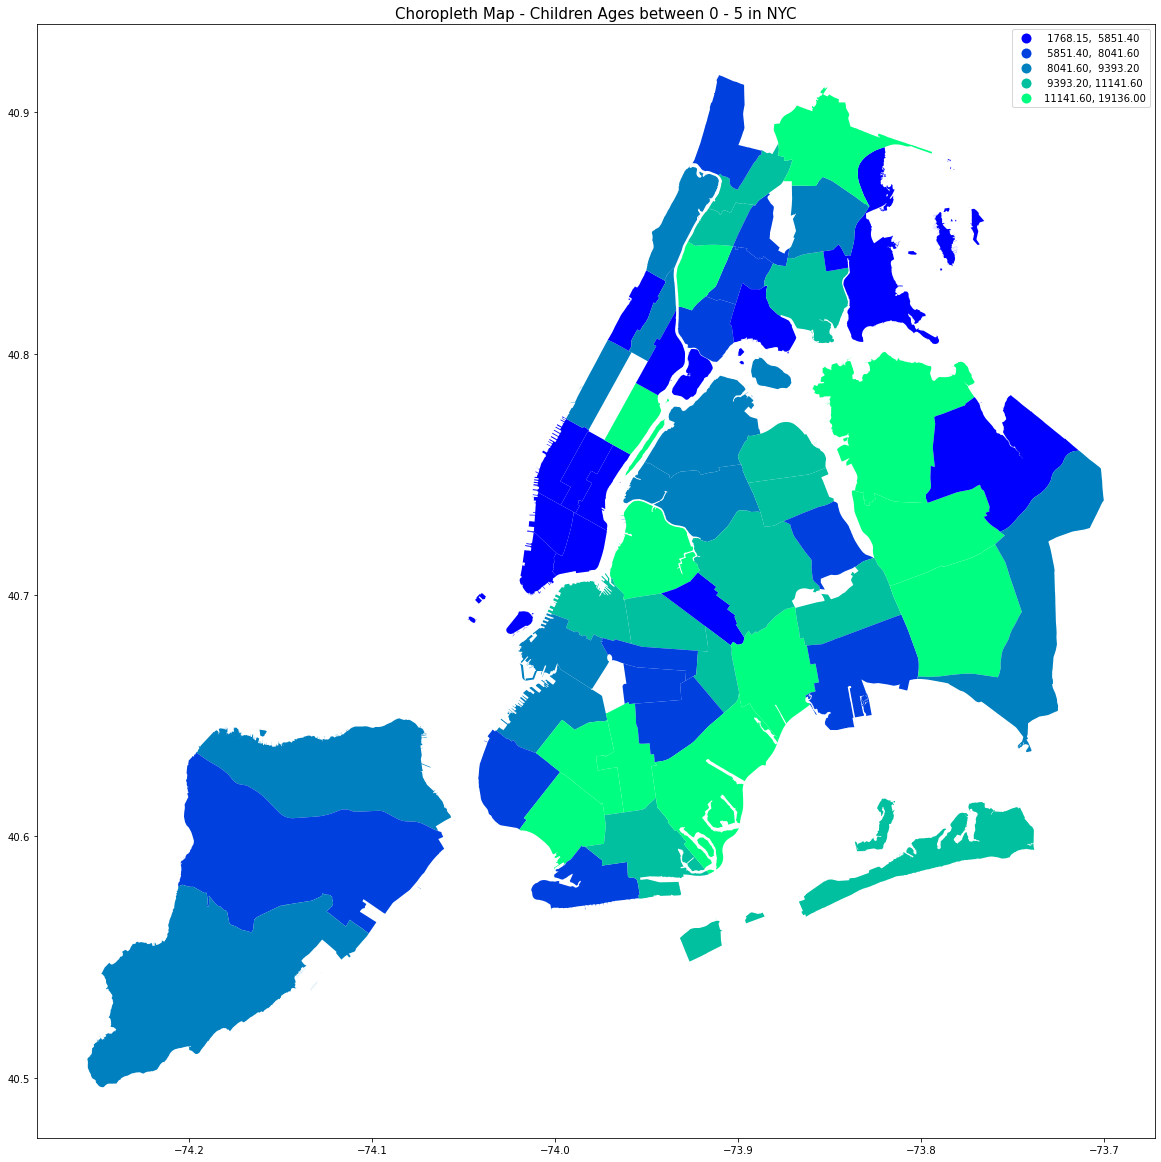

In [55]:
fig, ax = plt.subplots(figsize=(18,16))
population_community.plot(column='count', scheme='Quantiles', k=5, cmap='winter', legend=True, ax=ax)
plt.tight_layout()
plt.title('Choropleth Map - Children Ages between 0 - 5 in NYC', fontsize= 15,  y=0.5)
plt.savefig('choroplethmap.png', bbox_inches="tight")
plt.show()

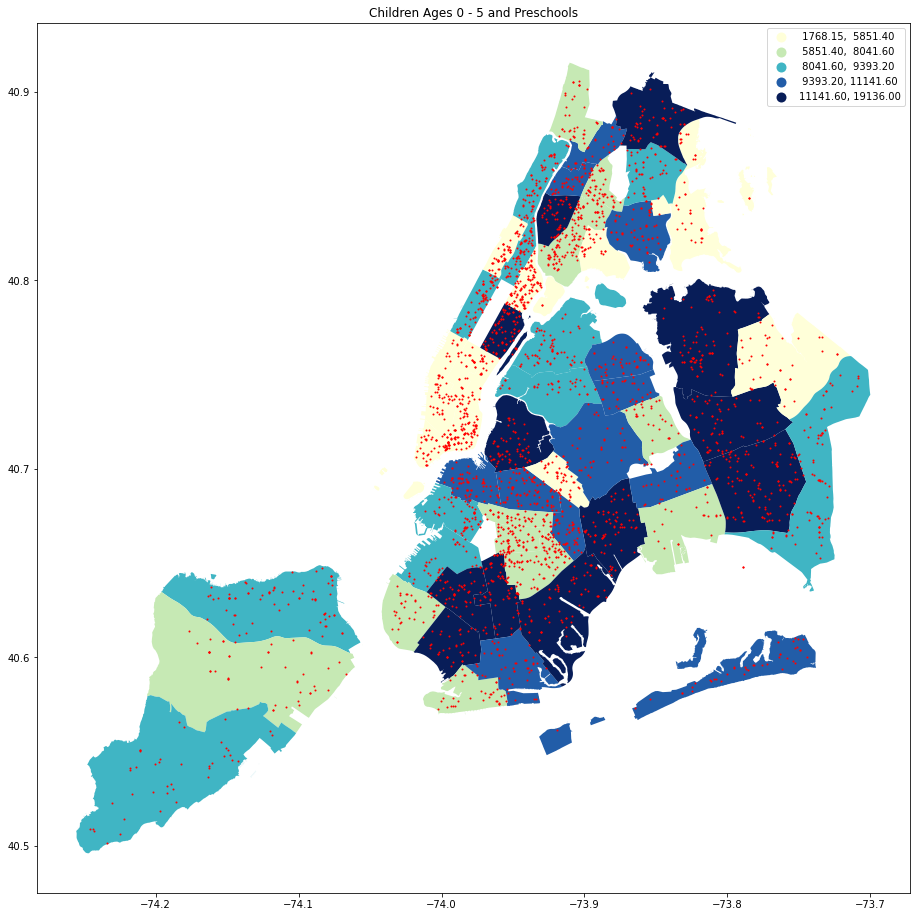

In [56]:
import matplotlib.pyplot as plt
fig,ax= plt.subplots(figsize=(18,16))
ax.set_aspect('equal')

population_community.plot(column='count', scheme='Quantiles', k=5, cmap='YlGnBu', legend=True, ax=ax);
child_care_ny_clean.plot(ax=ax, color='red', markersize=1)
#plt.tight_layout()
#ax.set_axis_off()
plt.title('Children Ages 0 - 5 and Preschools')
plt.savefig('choroplethmap_and_preschools.png', bbox_inches="tight")
plt.show()

#### Spatial Joins

In [57]:
pop_schools=gpd.sjoin(population_community,child_care_ny_clean,op='contains')

In [58]:
pop_schools.head()

,boro_cd,shape_area,shape_leng,geometry,location,age_group,year,count,index_right,X,...,ADDRESS,ZIP,TYPE,COUNTY,LATITUDE,LONGITUDE,BoroCode,BoroName,Shape_Leng,Shape_Area
0,101,4.268912e+07,74168.587892,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",Battery Park/Tribeca,Under 5 Years,2019,3293.34669,2502,-8.237841e+06,...,1 POLICE PLAZA,10038,CENTER BASED,NEW YORK,40.712177,-74.001785,1,Manhattan,359299.096471,6.364715e+08
0,101,4.268912e+07,74168.587892,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",Battery Park/Tribeca,Under 5 Years,2019,3293.34669,2548,-8.239227e+06,...,200 WEST STREET,10282,CENTER BASED,NEW YORK,40.714241,-74.014236,1,Manhattan,359299.096471,6.364715e+08
0,101,4.268912e+07,74168.587892,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",Battery Park/Tribeca,Under 5 Years,2019,3293.34669,2344,-8.238875e+06,...,275 GREENWICH STREET,10007,CENTER BASED,NEW YORK,40.715164,-74.011078,1,Manhattan,359299.096471,6.364715e+08
0,101,4.268912e+07,74168.587892,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",Battery Park/Tribeca,Under 5 Years,2019,3293.34669,2504,-8.238112e+06,...,26 FEDERAL PLAZA,10007,CENTER BASED,NEW YORK,40.715431,-74.004219,1,Manhattan,359299.096471,6.364715e+08
0,101,4.268912e+07,74168.587892,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",Battery Park/Tribeca,Under 5 Years,2019,3293.34669,2267,-8.238113e+06,...,26 FEDERAL PLAZA,10007,CENTER BASED,NEW YORK,40.715450,-74.004227,1,Manhattan,359299.096471,6.364715e+08


In [59]:
grouped_pop = pop_schools.groupby('boro_cd').size()

In [60]:
df = grouped_pop.to_frame().reset_index()

In [61]:
df.head()

,boro_cd,0
0,101,32
1,102,22
2,103,111
3,104,33
4,105,40


In [62]:
df.columns = ['boro_cd', 'preschool_count']

In [63]:
merged_population = population_community.merge(df, on='boro_cd', how='outer')

In [64]:
merged_population['preschool_count'].fillna(0,inplace=True)

In [65]:
merged_population['preschool_count'] = merged_population['preschool_count'].astype(int)

In [66]:
merged_population.sort_values(by=['preschool_count'],ascending=False)

,boro_cd,shape_area,shape_leng,geometry,location,age_group,year,count,preschool_count
53,412,2.673332e+08,65928.310532,"POLYGON ((-73.80168 40.66632, -73.80167 40.666...",Jamaica/St. Albans,Under 5 Years,2019,15071.00000,111
2,103,4.687978e+07,30695.640963,"POLYGON ((-73.97177 40.72582, -73.97179 40.725...",Lower East Side,Under 5 Years,2019,4967.00000,111
10,111,6.614601e+07,59502.908851,"MULTIPOLYGON (((-73.92134 40.80085, -73.92114 ...",East Harlem,Under 5 Years,2019,5789.00000,107
40,317,9.381023e+07,43326.833881,"POLYGON ((-73.90755 40.65119, -73.90849 40.650...",East Flatbush,Under 5 Years,2019,7830.00000,102
26,303,7.946136e+07,36213.696218,"POLYGON ((-73.91805 40.68721, -73.91800 40.686...",Bedford Stuyvesant,Under 5 Years,2019,10799.00000,82
6,107,5.315284e+07,39863.651204,"POLYGON ((-73.95965 40.80116, -73.95848 40.800...",Upper West Side,Under 5 Years,2019,9310.00000,79
48,407,3.282884e+08,145453.728681,"MULTIPOLYGON (((-73.85255 40.76007, -73.85224 ...",Flushing,Under 5 Years,2019,13718.00000,79
54,413,3.504694e+08,140593.306905,"POLYGON ((-73.74700 40.63689, -73.74701 40.636...",Queens Village,Under 5 Years,2019,8525.00000,78
7,108,5.517242e+07,53926.902271,"MULTIPOLYGON (((-73.93557 40.77192, -73.93566 ...",Upper East Side,Under 5 Years,2019,13426.00000,76
56,501,3.772536e+08,153873.506331,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",St. George,Under 5 Years,2019,9129.00000,73


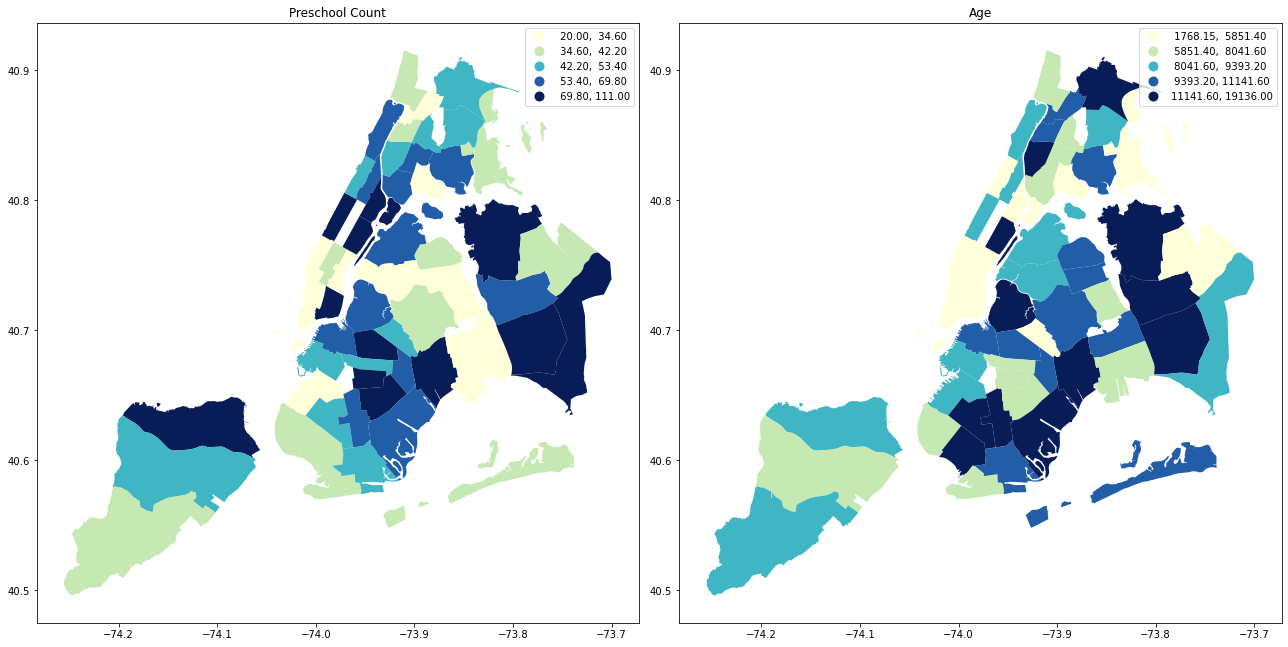

In [67]:
fig, ax = plt.subplots(1,2, figsize=(18,18))
merged_population.plot(column='preschool_count', scheme='Quantiles',k=5, cmap='YlGnBu', legend=True, ax=ax[0]);
merged_population.plot(column='count', scheme='Quantiles', k=5, cmap='YlGnBu', legend=True, ax=ax[1]);
plt.tight_layout()
ax[0].set_title("Preschool Count")
ax[1].set_title("Age")
plt.savefig('comparison.png', bbox_inches="tight")
plt.show()

##### Geoparsing with Python and Natural Language Processing

In [76]:
tweets=pd.read_csv("tweets.csv")
tweets.head()

,Tweets,Location,Sentiment
0,"RT @DeBruyneKev: We, the Players, stand togeth...","Rio de Janeiro, Brasil",0.000000
1,RT @elijahdaniel: RIP Derrick Scott. They’re o...,"Houston, TX",0.000000
2,RT @JWB28: This is why the protest won't end a...,not given,0.000000
3,"RT @PeopleMvmt: URGENT: Oakland, CA protestors...",DMV,-0.155556
4,For #BlackLivesMatter action @dogonvillage @ch...,not given,0.100000
